https://realpython.com/linear-regression-in-python/

In [61]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import mplfinance as mpf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Get the data

In [3]:
df = pd.read_csv('../../data/binance_BTCUSDT_1m_from_2020_01_01_to_2021_12_31_candlesticks_signals_raw.csv')

In [7]:
df.index = pd.DatetimeIndex(df['formatted_open_time'])

In [51]:
df.columns.values

array(['open_time', 'open', 'high', 'low', 'close', 'volume',
       'close_time', 'quote_asset_volumne', 'number_of_trades',
       'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volumne',
       'ignore', 'formatted_open_time', 'formatted_close_time',
       'upper_shadow', 'lower_shadow', 'real_body', 'CDLINVERTEDHAMMER',
       'CDLHAMMER', 'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR',
       'CDLHANGINGMAN', 'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR'],
      dtype=object)

## Select a particular candlestick patterns type to analyse

In [8]:
df[df['CDLMORNINGSTAR'] == 100]

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,lower_shadow,real_body,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 07:30:00,1577863800000,7231.04,7232.68,7230.99,7232.68,4.362601,1577863859999,3.154835e+04,75,1.267282,...,0.05,1.64,0,0,0,100,0,0,0,0
2020-01-01 09:26:00,1577870760000,7194.07,7196.74,7192.66,7196.14,13.769310,1577870819999,9.906435e+04,191,4.419020,...,1.41,2.07,0,0,0,100,0,0,0,0
2020-01-01 12:12:00,1577880720000,7208.65,7213.06,7208.33,7212.88,7.581551,1577880779999,5.466849e+04,88,6.662180,...,0.32,4.23,0,0,0,100,0,0,0,0
2020-01-01 13:41:00,1577886060000,7226.53,7231.41,7226.50,7230.85,10.633182,1577886119999,7.687597e+04,161,8.450260,...,0.03,4.32,0,0,0,100,0,0,0,0
2020-01-01 14:47:00,1577890020000,7219.89,7224.41,7219.89,7223.33,17.159653,1577890079999,1.239184e+05,130,11.344084,...,0.00,3.44,0,0,0,100,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-29 03:40:00,1640749200000,47945.29,47971.95,47936.57,47966.98,25.605810,1640749259999,1.227920e+06,580,12.308840,...,8.72,21.69,0,0,0,100,0,0,0,0
2021-12-29 17:41:00,1640799660000,47633.32,47659.19,47630.37,47659.19,20.516520,1640799719999,9.773565e+05,604,13.763550,...,2.95,25.87,0,0,0,100,0,0,0,0
2021-12-30 02:32:00,1640831520000,46468.91,46529.82,46443.16,46520.39,11.758500,1640831579999,5.465882e+05,560,5.251740,...,25.75,51.48,0,0,0,100,0,0,0,0


## Given the candlestick pattern, select one event in particular

In [108]:
event_date = '2020-01-01 12:12:00'

In [109]:
idx = df.index.get_loc(event_date)

In [142]:
time_window_in_min = 15

In [143]:
df_temp = df.iloc[idx - time_window_in_min : idx + time_window_in_min + 1]
df_temp

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,lower_shadow,real_body,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 11:57:00,1577879820000,7200.92,7202.11,7192.95,7192.95,13.976493,1577879879999,100599.480835,182,7.233246,...,0.00,7.97,0,0,0,0,0,0,0,0
2020-01-01 11:58:00,1577879880000,7193.48,7199.07,7191.71,7197.90,9.018116,1577879939999,64901.982414,121,5.110727,...,1.77,4.42,0,0,0,0,0,0,0,0
2020-01-01 11:59:00,1577879940000,7198.20,7198.94,7196.32,7197.20,8.087552,1577879999999,58210.259588,67,3.379916,...,0.88,1.00,0,0,0,0,0,0,0,0
2020-01-01 12:00:00,1577880000000,7197.20,7200.00,7196.15,7200.00,18.749397,1577880059999,134957.098816,154,11.385780,...,1.05,2.80,0,0,0,0,0,0,0,0
2020-01-01 12:01:00,1577880060000,7200.00,7203.48,7199.70,7202.89,13.969115,1577880119999,100594.832289,160,8.027840,...,0.30,2.89,0,0,0,0,0,0,0,0
2020-01-01 12:02:00,1577880120000,7202.38,7209.71,7202.08,7205.16,28.149739,1577880179999,202852.780338,299,19.641650,...,0.30,2.78,0,0,0,0,0,0,0,0
2020-01-01 12:03:00,1577880180000,7204.68,7208.42,7203.32,7208.02,6.658080,1577880239999,47972.381497,98,4.064268,...,1.36,3.34,0,0,0,0,0,0,0,0
2020-01-01 12:04:00,1577880240000,7208.17,7209.68,7203.39,7204.08,12.021800,1577880299999,86645.935479,139,6.419566,...,0.69,4.09,0,0,0,0,0,0,0,0
2020-01-01 12:05:00,1577880300000,7204.41,7206.23,7203.00,7205.62,11.618038,1577880359999,83705.053131,146,3.982028,...,1.41,1.21,0,0,0,0,0,0,0,0


## Plot the event range

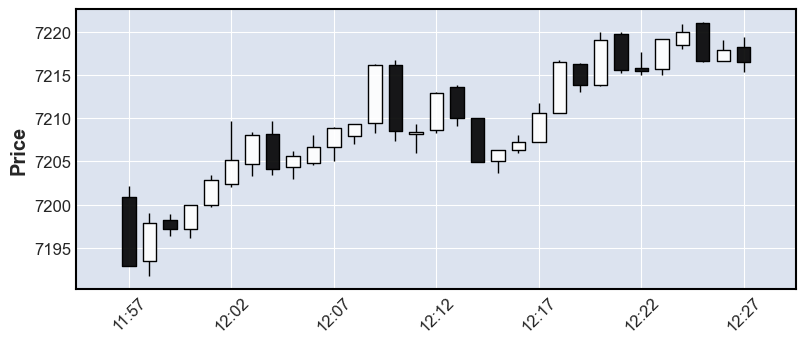

In [144]:
mpf.plot(df_temp, type='candle', figsize=(10,4))

## Do the linear regression of 'left' and 'right' sides

### Left

In [145]:
x_left = df_temp[df_temp.index < event_date].open_time.values.reshape((-1,1))
y_left = df_temp[df_temp.index < event_date].close.values

In [146]:
model_left = LinearRegression()

In [147]:
model_left.fit(x_left, y_left)

LinearRegression()

In [148]:
r_sq = model_left.score(x_left, y_left)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_left.intercept_}")
print(f"slope: {model_left.coef_}")

coefficient of determination: 0.771084324645857
intercept: -30242074.323000398
slope: [1.91708333e-05]


In [149]:
 y_left_pred = model_left.predict(x_left)
 print(f"predicted response:\n{y_left_pred}")

predicted response:
[7196.72625 7197.8765  7199.02675 7200.177   7201.32725 7202.4775
 7203.62775 7204.778   7205.92825 7207.0785  7208.22875 7209.379
 7210.52925 7211.6795  7212.82975]


### Right

In [150]:
x_right = df_temp[df_temp.index > event_date].open_time.values.reshape((-1,1))
y_right = df_temp[df_temp.index > event_date].close.values

In [151]:
model_right = LinearRegression()

In [152]:
model_right.fit(x_right, y_right)

LinearRegression()

In [153]:
r_sq = model_right.score(x_right, y_right)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_right.intercept_}")
print(f"slope: {model_right.coef_}")

coefficient of determination: 0.6574576452290206
intercept: -23542662.934000235
slope: [1.4925e-05]


In [154]:
 y_right_pred = model_right.predict(x_right)
 print(f"predicted response:\n{y_right_pred}")

predicted response:
[7207.7075 7208.603  7209.4985 7210.394  7211.2895 7212.185  7213.0805
 7213.976  7214.8715 7215.767  7216.6625 7217.558  7218.4535 7219.349
 7220.2445]


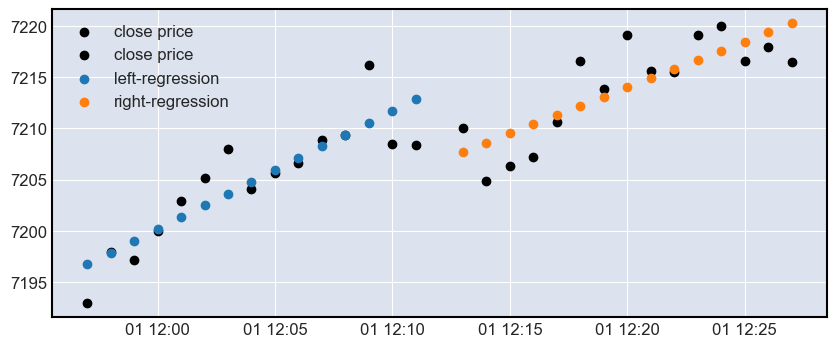

In [155]:
plt.figure(figsize=(10,4))

x_left_new = df_temp[df_temp.index < event_date].index.values.reshape((-1,1))
x_right_new = df_temp[df_temp.index > event_date].index.values.reshape((-1,1))

# plot lines
plt.scatter(x_left_new, y_left, label = "close price", color="black")
plt.scatter(x_right_new, y_right, label = "close price", color="black")
plt.scatter(x_left_new, y_left_pred, label = "left-regression")
plt.scatter(x_right_new, y_right_pred, label = "right-regression")
plt.legend()

plt.show()

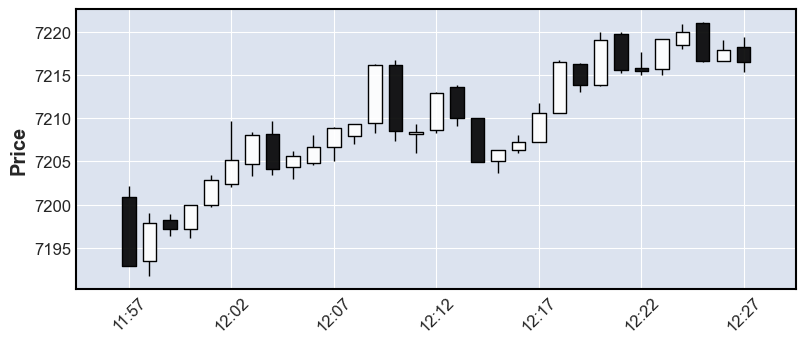

In [156]:
mpf.plot(df_temp, type='candle', figsize=(10,4))